# Load results from TSEA/CSEA and make a simpler plot

Update 210323 to sampling results

Update 210629 to include height

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import random


# latex rendering of text in graphs
import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif')

sns.set(font_scale=1.3)
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

sns.set_style('white')
sns.set_style("ticks", {"xtick.major.size": 15, "ytick.major.size": 15})
plt.rcParams['svg.fonttype'] = 'none'
import sys

% matplotlib inline

# for better labeling
import adjustText

# Load BMI tissue specific results

In [17]:
# load tissue-specific results
tsea_df = pd.read_excel('../tables/TSEA_rat_human_BMI_GIANT_sampling_210323.xlsx')
tsea_df = tsea_df[['Tissues and P-Values',0.05]]
tsea_df.columns=['Tissue','tsea_threshold_0.05']

p_split = tsea_df['tsea_threshold_0.05'].tolist()
p_list = [np.float(p.split(' ')[0]) for p in p_split]
FDR_list = [np.float(p.split(' ')[2]) for p in p_split]

tsea_df['p']=p_list
tsea_df['FDR']=FDR_list
tsea_df=tsea_df.sort_values('p')
tsea_df.index=tsea_df['Tissue']
tsea_df['pheno']='BMI'
tsea_df.head()

,Tissue,tsea_threshold_0.05,p,FDR,pheno
Tissue,,,,,
Brain,Brain,1.247e-08 ( 3.117e-07 ),1.247000e-08,3.117000e-07,BMI
Nerve,Nerve,0.0006537 ( 0.008 ),6.537000e-04,8.000000e-03,BMI
Pancreas,Pancreas,0.009 ( 0.067 ),9.000000e-03,6.700000e-02,BMI
Uterus,Uterus,0.011 ( 0.067 ),1.100000e-02,6.700000e-02,BMI
Pituitary,Pituitary,0.021 ( 0.104 ),2.100000e-02,1.040000e-01,BMI


In [18]:
tsea_height_df = pd.read_excel('../tables/TSEA_rat_human_HEIGHT_GIANT_sampling_210323.xlsx')
tsea_height_df = tsea_height_df[['Tissues and P-Values',0.05]]
tsea_height_df.columns=['Tissue','tsea_threshold_0.05']


p_split = tsea_height_df['tsea_threshold_0.05'].tolist()
p_list = [np.float(p.split(' ')[0]) for p in p_split]
FDR_list = [np.float(p.split(' ')[2]) for p in p_split]

tsea_height_df['p']=p_list
tsea_height_df['FDR']=FDR_list
tsea_height_df=tsea_height_df.sort_values('p')
tsea_height_df.index=tsea_height_df['Tissue']
tsea_height_df['pheno']='height'
tsea_height_df.head()

,Tissue,tsea_threshold_0.05,p,FDR,pheno
Tissue,,,,,
Blood Vessel,Blood Vessel,0.169 ( 1.0 ),0.169,1.0,height
Blood,Blood,0.241 ( 1.0 ),0.241,1.0,height
Adipose Tissue,Adipose Tissue,0.531 ( 1.0 ),0.531,1.0,height
Muscle,Muscle,0.614 ( 1.0 ),0.614,1.0,height
Fallopian Tube,Fallopian Tube,0.64 ( 1.0 ),0.640,1.0,height


In [16]:
tsea_height_df['FDR'].min()

1.0

In [19]:
tsea_df = tsea_df.append(tsea_height_df)
tsea_df['-log10(FDR)']=-np.log10(tsea_df['FDR'])
tsea_df['-log10(p)']=-np.log10(tsea_df['p'])
tsea_df.head()

,Tissue,tsea_threshold_0.05,p,FDR,pheno,-log10(FDR),-log10(p)
Tissue,,,,,,,
Brain,Brain,1.247e-08 ( 3.117e-07 ),1.247000e-08,3.117000e-07,BMI,6.506263,7.904134
Nerve,Nerve,0.0006537 ( 0.008 ),6.537000e-04,8.000000e-03,BMI,2.096910,3.184622
Pancreas,Pancreas,0.009 ( 0.067 ),9.000000e-03,6.700000e-02,BMI,1.173925,2.045757
Uterus,Uterus,0.011 ( 0.067 ),1.100000e-02,6.700000e-02,BMI,1.173925,1.958607
Pituitary,Pituitary,0.021 ( 0.104 ),2.100000e-02,1.040000e-01,BMI,0.982967,1.677781


In [30]:
tissues_plot = np.unique(tsea_df[tsea_df['p']<1].index.tolist())
print(len(tissues_plot))

25


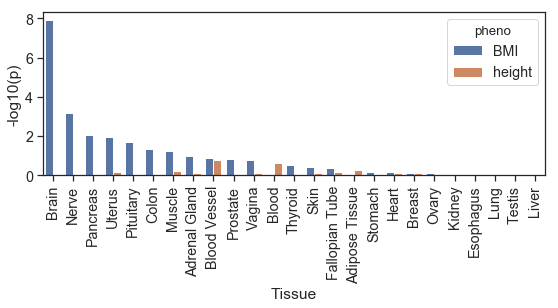

In [36]:
plt.figure(figsize=(9,3))
plot_temp = tsea_df.loc[tissues_plot]
plot_temp = plot_temp.sort_values('p')
# plt.bar(np.arange(len(tsea_df)),-np.log10(tsea_df['FDR'].tolist()))
sns.barplot(x='Tissue',y='-log10(p)',data=plot_temp,hue='pheno')
tmp=plt.xticks(rotation='vertical')
plt.ylabel('-log10(p)')
plt.savefig('../manuscript/figures/figure3/tsea_rat_human_BMI_210629.png',dpi=300,bbox_inches='tight')
# plt.savefig('../manuscript/figures/figure3/tsea_rat_human_BMI_210212.svg')

In [22]:
tsea_df.loc[tissues_plot]

,Tissue,tsea_threshold_0.05,p,FDR,pheno,-log10(FDR),-log10(p)
Tissue,,,,,,,
Adrenal Gland,Adrenal Gland,0.107 ( 0.334 ),1.070000e-01,3.340000e-01,BMI,0.476254,0.970616
Adrenal Gland,Adrenal Gland,0.718 ( 1.0 ),7.180000e-01,1.000000e+00,height,-0.000000,0.143876
Blood,Blood,0.912 ( 0.999 ),9.120000e-01,9.990000e-01,BMI,0.000435,0.040005
Blood,Blood,0.241 ( 1.0 ),2.410000e-01,1.000000e+00,height,-0.000000,0.617983
Blood Vessel,Blood Vessel,0.134 ( 0.357 ),1.340000e-01,3.570000e-01,BMI,0.447332,0.872895
Blood Vessel,Blood Vessel,0.169 ( 1.0 ),1.690000e-01,1.000000e+00,height,-0.000000,0.772113
Brain,Brain,1.247e-08 ( 3.117e-07 ),1.247000e-08,3.117000e-07,BMI,6.506263,7.904134
Brain,Brain,0.994 ( 1.0 ),9.940000e-01,1.000000e+00,height,-0.000000,0.002614
Colon,Colon,0.043 ( 0.178 ),4.300000e-02,1.780000e-01,BMI,0.749580,1.366532


NameError: name 'csea_df' is not defined

In [34]:
# load brain-region-specific results
csea_df = pd.read_excel('../tables/CSEA_brain_rat_human_BMI_GIANT_sampling_210323.xlsx')
csea_df = csea_df[['Brain Regions and Development and P-Values',0.05]]
csea_df.columns=['Brain Region','tsea_threshold_0.05']

p_split = csea_df['tsea_threshold_0.05'].tolist()
p_list = [np.float(p.split(' ')[0]) for p in p_split]
FDR_list = [np.float(p.split(' ')[2].strip(')')) for p in p_split]

csea_df['p']=p_list
csea_df['FDR']=FDR_list
csea_df=csea_df.sort_values('p')
new_index = [i.split('.')[0] for i in csea_df['Brain Region'].tolist()]
csea_df.index=new_index
csea_df.head()

,Brain Region,tsea_threshold_0.05,p,FDR
Cortex,Cortex.Young.Adulthood,0.007 ( 0.044),0.007,0.044
Thalamus,Thalamus.Young.Adulthood,0.041 ( 0.122),0.041,0.122
Cerebellum,Cerebellum.Young.Adulthood,0.113 ( 0.225),0.113,0.225
Hippocampus,Hippocampus.Young.Adulthood,0.473 ( 0.710),0.473,0.710
Amygdala,Amygdala.Young.Adulthood,0.695 ( 0.785),0.695,0.785


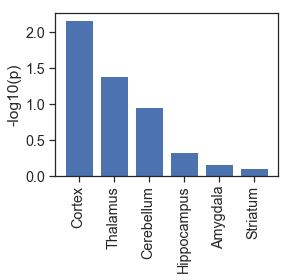

In [37]:
plt.figure(figsize=(4,3))
plt.bar(np.arange(len(csea_df)),-np.log10(csea_df['p'].tolist()))
tmp=plt.xticks(np.arange(len(csea_df)),csea_df.index.tolist(),rotation='vertical')

plt.ylabel('-log10(p)')

plt.savefig('../manuscript/figures/figure3/csea_rat_human_BMI_210629.png',dpi=300,bbox_inches='tight')
# plt.savefig('../manuscript/figures/figure3/csea_rat_human_BMI_210323.svg')